In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

1. Эксперимент №0

In [137]:
df0 = pd.read_csv('experiment_0_d.txt', names=['num', 'country', 'age', 'i'])
age_map = {0: 'newborn', 1: 'young', 2: 'adult', 3: 'old'}
df0['age'] = df0['age'].apply(lambda x: age_map[x])
df0['country'] = df0['country'].astype('str')

In [138]:
fig = px.bar(df0.groupby(['country', 'i'], as_index=False).sum(), x='i', y='num', color='country')
fig.show()
fig.write_image("demogr3.png")

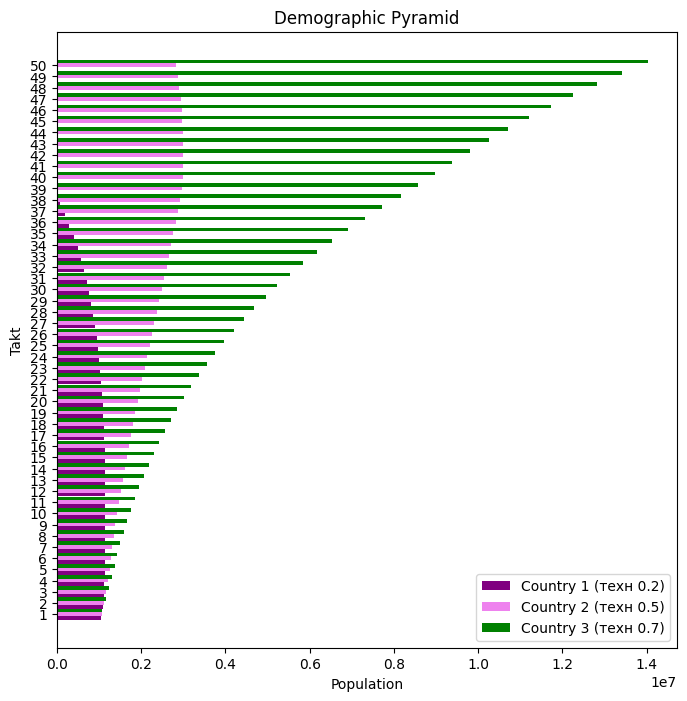

In [139]:
df0_g = df0.groupby(['country', 'i'], as_index=False).sum()
df0_c5 = df0_g[df0_g['country'] == '0.5']
df0_c7= df0_g[df0_g['country'] == '0.7']
df0_c2 = df0_g[df0_g['country'] == '0.2']

takts = df0_g['i'].unique()
c21_population = df0_c2['num'].values
c71_population = df0_c7['num'].values
c51_population = df0_c5['num'].values
fig, ax = plt.subplots(figsize=(8, 8))

bar_width = 0.33
bar_positions_c11 = np.arange(len(takts))
bar_positions_c21 = bar_positions_c11 + bar_width 
bar_positions_c31 = bar_positions_c11 + bar_width * 2 


ax.barh(bar_positions_c11, c21_population, height=bar_width, color='purple', label='Country 1 (техн 0.2)')
ax.barh(bar_positions_c21, c51_population, height=bar_width, color='violet', label='Country 2 (техн 0.5)')
ax.barh(bar_positions_c31, c71_population, height=bar_width, color='green', label='Country 3 (техн 0.7)')

ax.set_yticks(bar_positions_c11 + bar_width) 
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()
plt.savefig("demg3.png")
plt.show()

In [140]:
df0_ls = pd.read_csv('experiment_0_li.txt', names=['livst', 'country', 'i', 'inst'])
fig = px.line(df0_ls, x='i', y='livst', color='country', title='Уровень жизни')
fig.update_layout(
    width=1000, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='уровень жизни', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("livst3.png")

In [141]:
fig = px.line(df0_ls, x='i', y='inst', color='country', title='Индекс социальной нестабильности')
fig.update_layout(
    width=800, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='индекс социальной нестабильности', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("instab3.png")

__Эксперимент №1__

In [142]:
df5 = pd.read_csv('experiment_1_d.txt', names=['num', 'country', 'age', 'i'])
age_map = {0: 'newborn', 1: 'young', 2: 'adult', 3: 'old'}
df5['age'] = df5['age'].apply(lambda x: age_map[x])
df5['country'] = df5['country'].astype('str')
df5.loc[950:999]

,num,country,age,i
950,0,0.2,adult,48
951,6,0.2,old,48
952,1347383,0.3,newborn,48
953,415577,0.3,young,48
954,516738,0.3,adult,48
955,337119,0.3,old,48
956,10058999,0.5,newborn,48
957,4829800,0.5,young,48
958,6181996,0.5,adult,48
959,2514479,0.5,old,48


In [143]:
fig = px.bar(df5.groupby(['country', 'i'], as_index=False).sum(), x='i', y='num', color='country')
fig.show()
fig.write_image("demogr5.png")

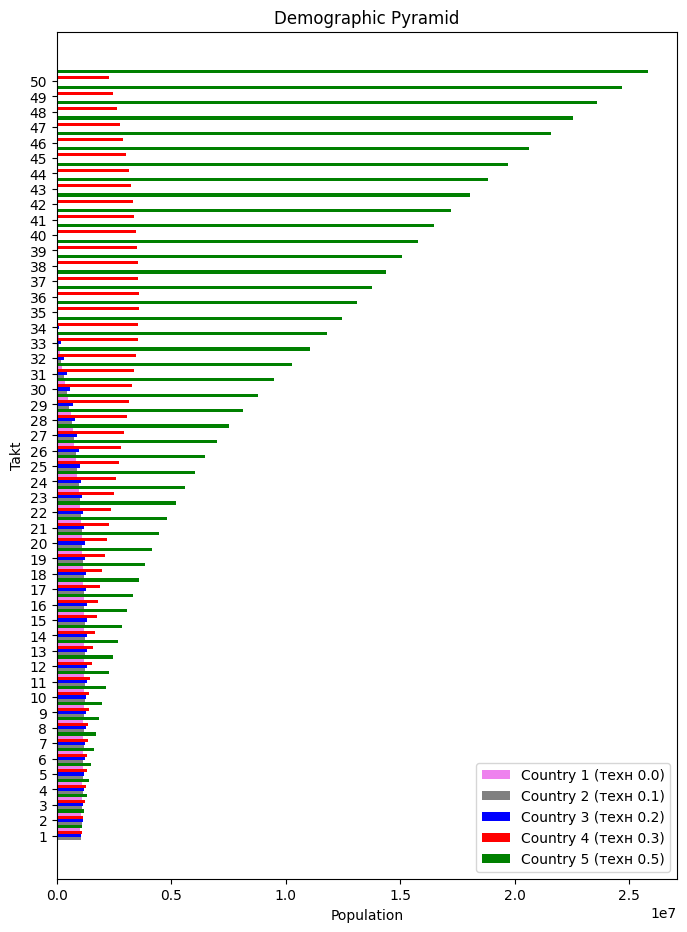

In [144]:
df5_g = df5.groupby(['country', 'i'], as_index=False).sum()
df5_c0 = df5_g[df5_g['country'] == '0.0']
df5_c1= df5_g[df5_g['country'] == '0.1']
df5_c2 = df5_g[df5_g['country'] == '0.2']
df5_c3 = df5_g[df5_g['country'] == '0.3']
df5_c5 = df5_g[df5_g['country'] == '0.5']

takts = df5_g['i'].unique()
c01_population = df5_c0['num'].values
c11_population = df5_c1['num'].values
c21_population = df5_c2['num'].values
c31_population = df5_c3['num'].values
c51_population = df5_c5['num'].values
fig, ax = plt.subplots(figsize=(8, 11))

bar_width = 0.2
bar_positions_c11 = np.arange(len(takts))
bar_positions_c21 = bar_positions_c11 + bar_width 
bar_positions_c31 = bar_positions_c11 + bar_width * 2 
bar_positions_c51 = bar_positions_c11 + bar_width * 4
bar_positions_c01 = bar_positions_c11 + bar_width * 3

ax.barh(bar_positions_c01, c01_population, height=bar_width, color='violet', label='Country 1 (техн 0.0)')
ax.barh(bar_positions_c11, c11_population, height=bar_width, color='gray', label='Country 2 (техн 0.1)')
ax.barh(bar_positions_c21, c21_population, height=bar_width, color='blue', label='Country 3 (техн 0.2)')
ax.barh(bar_positions_c31, c31_population, height=bar_width, color='red', label='Country 4 (техн 0.3)')
ax.barh(bar_positions_c51, c51_population, height=bar_width, color='green', label='Country 5 (техн 0.5)')

ax.set_yticks(bar_positions_c11 + bar_width) 
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()
plt.savefig("dem1.png")
plt.show()

In [145]:
df5_ls = pd.read_csv('experiment_1_li.txt', names=['livst', 'country', 'i', 'inst'])
fig = px.line(df5_ls, x='i', y='livst', color='country', title='Уровень жизни')
fig.update_layout(
    width=1000, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='уровень жизни', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("livst5.png")

In [146]:
fig = px.line(df5_ls, x='i', y='inst', color='country', title='Индекс социальной нестабильности')
fig.update_layout(
    width=800, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='индекс социальной нестабильности', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("instab5.png")

__2. Эксперимент №2__

In [63]:
df1 = pd.read_csv('experiment_2_d.txt', names=['num', 'country', 'age', 'i'])
age_map = {0: 'newborn', 1: 'young', 2: 'adult', 3: 'old'}
df1['age'] = df1['age'].apply(lambda x: age_map[x])
df1['country'] = df1['country'].astype('str')
df1

,num,country,age,i
0,320000,0.1,newborn,1
1,106000,0.1,young,1
2,353000,0.1,adult,1
3,200000,0.1,old,1
4,320000,0.2,newborn,1
...,...,...,...,...
1995,1920111,0.9,old,50
1996,13511315,1.0,newborn,50
1997,6394094,1.0,young,50
1998,8284218,1.0,adult,50


In [134]:
fig = px.bar(df1.groupby(['country', 'i'], as_index=False).sum(), x='i', y='num', color='country')
fig.show()
fig.write_image("demogr10.png")

In [65]:
df1_g = df1.groupby(['country', 'i'], as_index=False).sum()
df1_c1= df1_g[df1_g['country'] == '0.1']
df1_c2 = df1_g[df1_g['country'] == '0.2']
df1_c3 = df1_g[df1_g['country'] == '0.3']
df1_c4 = df1_g[df1_g['country'] == '0.4']
df1_c5 = df1_g[df1_g['country'] == '0.5']
df1_c6 = df1_g[df1_g['country'] == '0.6']
df1_c7 = df1_g[df1_g['country'] == '0.7']
df1_c8 = df1_g[df1_g['country'] == '0.8']
df1_c9 = df1_g[df1_g['country'] == '0.9']
df1_c10 = df1_g[df1_g['country'] == '1.0']



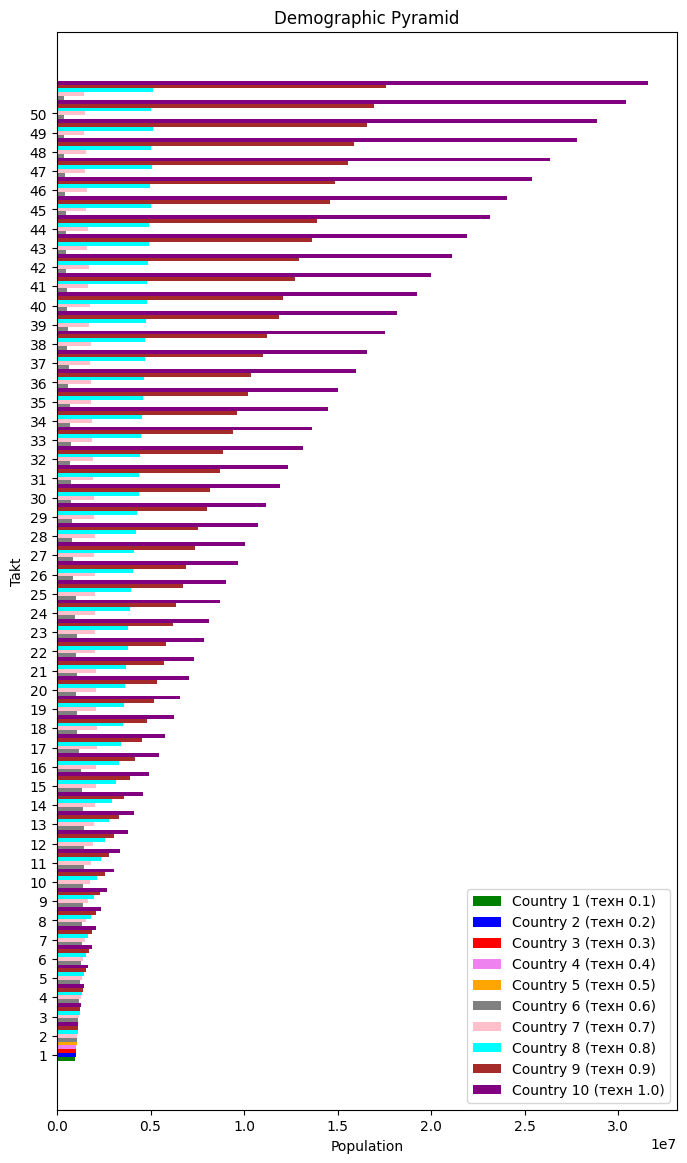

In [66]:
takts = df1_g['i'].unique()
c11_population = df1_c1['num'].values
c21_population = df1_c2['num'].values
c31_population = df1_c3['num'].values
c41_population = df1_c4['num'].values
c51_population = df1_c5['num'].values
c61_population = df1_c6['num'].values
c71_population = df1_c7['num'].values
c81_population = df1_c8['num'].values
c91_population = df1_c9['num'].values
c101_population = df1_c10['num'].values
fig, ax = plt.subplots(figsize=(8, 14))

bar_width = 0.2
bar_positions_c11 = np.arange(len(takts))
bar_positions_c21 = bar_positions_c11 + bar_width 
bar_positions_c31 = bar_positions_c11 + bar_width * 2 
bar_positions_c41 = bar_positions_c11 + bar_width * 3
bar_positions_c51 = bar_positions_c11 + bar_width * 4
bar_positions_c61 = bar_positions_c11 + bar_width * 5
bar_positions_c71 = bar_positions_c11 + bar_width * 6 
bar_positions_c81 = bar_positions_c11 + bar_width * 7
bar_positions_c91 = bar_positions_c11 + bar_width * 8
bar_positions_c101 = bar_positions_c11 + bar_width * 9

ax.barh(bar_positions_c11, c11_population, height=bar_width, color='green', label='Country 1 (техн 0.1)')
ax.barh(bar_positions_c21, c21_population, height=bar_width, color='blue', label='Country 2 (техн 0.2)')
ax.barh(bar_positions_c31, c31_population, height=bar_width, color='red', label='Country 3 (техн 0.3)')
ax.barh(bar_positions_c41, c41_population, height=bar_width, color='violet', label='Country 4 (техн 0.4)')
ax.barh(bar_positions_c51, c51_population, height=bar_width, color='orange', label='Country 5 (техн 0.5)')
ax.barh(bar_positions_c61, c61_population, height=bar_width, color='grey', label='Country 6 (техн 0.6)')
ax.barh(bar_positions_c71, c71_population, height=bar_width, color='pink', label='Country 7 (техн 0.7)')
ax.barh(bar_positions_c81, c81_population, height=bar_width, color='cyan', label='Country 8 (техн 0.8)')
ax.barh(bar_positions_c91, c91_population, height=bar_width, color='brown', label='Country 9 (техн 0.9)')
ax.barh(bar_positions_c101, c101_population, height=bar_width, color='purple', label='Country 10 (техн 1.0)')

ax.set_yticks(bar_positions_c11 + bar_width) 
ax.set_yticklabels(takts)
ax.set_xlabel('Population')
ax.set_ylabel('Takt')
ax.set_title('Demographic Pyramid')

ax.legend()
plt.savefig("dem1.png")
plt.show()

In [67]:
fig = px.bar(df1.groupby(['age', 'i'], as_index=False).sum(), x='i', y='num', color='age')
fig.update_layout(
    width=800, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='численность', 
    showlegend=True,  
    legend_title='Возрастные группы',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("bb1.png")

hhhhhhh

In [151]:
df3_ls = pd.read_csv('experiment_2_li.txt', names=['livst', 'country', 'i', 'inst'])


In [152]:
fig = px.line(df3_ls, x='i', y='livst', color='country', title='Уровень жизни')
fig.update_layout(
    width=1000, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='уровень жизни', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("livst10.png")

In [154]:
fig = px.line(df3_ls, x='i', y='inst', color='country', title='Индекс социальной нестабильности')
fig.update_layout(
    width=800, 
    height=600,
    xaxis_title='такт',  
    yaxis_title='индекс социальной нестабильности', 
    showlegend=True,  
    legend_title='Технический ресурс страны',  
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1)
)
fig.show()
fig.write_image("instind10.png")